<a href="https://colab.research.google.com/github/VarunArora14/ML-minor-project/blob/master/Colab%20draft_mutual_classif_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# imports
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.model_selection import train_test_split


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/test1.csv" # non feature selection csv 
df = pd.read_csv(path)
df = pd.read_csv(path)

In [5]:
df["TARGET"].value_counts()

0    281818
1     24771
Name: TARGET, dtype: int64

In [6]:
df.head()

,Unnamed: 0,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,...,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL,TARGET
0,1,1,1,1,1,1,2.0,0,1,0.0,...,3.254795,0,0,270000.0,1.0,1.0,1129500.0,0.0,0,0
1,2,1,1,1,2,2,1.0,1,1,0.0,...,0.616438,0,0,67500.0,0.0,0.0,135000.0,0.0,0,0
2,3,1,1,1,2,2,2.0,0,0,1.0,...,8.326027,0,0,135000.0,2.0,2.0,297000.0,0.0,0,0
3,4,1,1,1,2,2,1.0,0,0,0.0,...,8.323288,1,0,121500.0,0.0,0.0,513000.0,0.0,0,0
4,5,1,1,1,2,2,2.0,0,1,1.0,...,4.350685,0,0,99000.0,0.0,0.0,454500.0,1.0,0,0


In [7]:
df.columns

Index(['Unnamed: 0', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMP_PHONE',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'CNT_FAM_MEMBERS', 'FLAG_OWN_CAR', 'FLAG_PHONE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_WORK_PHONE', 'DAYS_EMPLOYED', 'EMPLOYMENT_YEARS',
       'LIVE_CITY_NOT_WORK_CITY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_EMAIL', 'TARGET'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
df.head()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,...,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL,TARGET
0,1,1,1,1,1,2.0,0,1,0.0,0,...,3.254795,0,0,270000.0,1.0,1.0,1129500.0,0.0,0,0
1,1,1,1,2,2,1.0,1,1,0.0,0,...,0.616438,0,0,67500.0,0.0,0.0,135000.0,0.0,0,0
2,1,1,1,2,2,2.0,0,0,1.0,0,...,8.326027,0,0,135000.0,2.0,2.0,297000.0,0.0,0,0
3,1,1,1,2,2,1.0,0,0,0.0,1,...,8.323288,1,0,121500.0,0.0,0.0,513000.0,0.0,0,0
4,1,1,1,2,2,2.0,0,1,1.0,0,...,4.350685,0,0,99000.0,0.0,0.0,454500.0,1.0,0,0


In [10]:
df.isnull().sum()

FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
CNT_FAM_MEMBERS                0
FLAG_OWN_CAR                   0
FLAG_PHONE                     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
REG_CITY_NOT_WORK_CITY         0
FLAG_WORK_PHONE                0
DAYS_EMPLOYED                  0
EMPLOYMENT_YEARS               0
LIVE_CITY_NOT_WORK_CITY        0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
OBS_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
AMT_GOODS_PRICE                0
AMT_REQ_CREDIT_BUREAU_QRT      0
FLAG_EMAIL                     0
TARGET                         0
dtype: int64

### Scaling features of the dataset (to handle imbalanced data)

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
df1 = df.copy(deep=True)

In [13]:
df1= df1.drop('TARGET', axis=1)

In [14]:
x= df.drop('TARGET',axis=1)
y= df['TARGET']

In [15]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
df_scaled = pd.DataFrame(scaler.fit_transform(x),columns=df1.columns,index=df1.index)

In [16]:
df_scaled.head() # scaled dataframe

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,...,DAYS_EMPLOYED,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL
0,0.0,1.0,1.0,0.0,0.0,0.052632,0.0,1.0,0.00,0.0,...,0.003253,0.003253,0.0,0.0,0.337649,0.002874,0.002907,0.271605,0.000000,0.0
1,0.0,1.0,1.0,0.5,0.5,0.000000,1.0,1.0,0.00,0.0,...,0.000616,0.000616,0.0,0.0,0.057829,0.000000,0.000000,0.023569,0.000000,0.0
2,0.0,1.0,1.0,0.5,0.5,0.052632,0.0,0.0,0.04,0.0,...,0.008320,0.008320,0.0,0.0,0.151102,0.005747,0.005814,0.063973,0.000000,0.0
3,0.0,1.0,1.0,0.5,0.5,0.000000,0.0,0.0,0.00,1.0,...,0.008318,0.008318,1.0,0.0,0.132448,0.000000,0.000000,0.117845,0.000000,0.0
4,0.0,1.0,1.0,0.5,0.5,0.052632,0.0,1.0,0.04,0.0,...,0.004348,0.004348,0.0,0.0,0.101357,0.000000,0.000000,0.103255,0.003831,0.0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x= df_scaled # getting x feature set from scaled data frame
# y has already been taken in line 399

In [19]:
df_scaled.isna().sum()

FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
CNT_FAM_MEMBERS                0
FLAG_OWN_CAR                   0
FLAG_PHONE                     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
REG_CITY_NOT_WORK_CITY         0
FLAG_WORK_PHONE                0
DAYS_EMPLOYED                  0
EMPLOYMENT_YEARS               0
LIVE_CITY_NOT_WORK_CITY        0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
OBS_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
AMT_GOODS_PRICE                0
AMT_REQ_CREDIT_BUREAU_QRT      0
FLAG_EMAIL                     0
dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#### SMOTE for imbalanced classification (smaller number of target=1)

In [21]:
from imblearn.over_sampling import SMOTE  # used for imbalanced dataset 

In [22]:
sm = SMOTE(random_state = 500)
X_res, y_res = sm.fit_resample(X_train,y_train)

### Training Prediction model

1. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model1 = LogisticRegression(solver='lbfgs', max_iter=100)

In [25]:
model1.fit(X_res, y_res)

LogisticRegression()

In [26]:
#predcit

y_pred1 = model1.predict(X_test)
y_pred1

array([1, 0, 0, ..., 1, 0, 1])

In [27]:
#scores
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
accuracy = model1.score(X_test, y_test)
accuracy

0.5714635180534264

In [28]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71     56330
           1       0.11      0.62      0.19      4988

    accuracy                           0.57     61318
   macro avg       0.53      0.59      0.45     61318
weighted avg       0.88      0.57      0.67     61318



In [29]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[31970, 24360],
       [ 1917,  3071]])

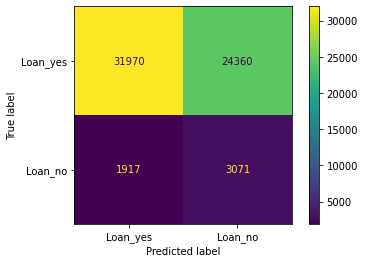

In [30]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

2. Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

In [32]:
model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(X_res, y_res)

RandomForestClassifier()

In [33]:
y_pred2 = model2.predict(X_test)
accuracy = model2.score(X_test, y_test)
accuracy

0.9025082357545908

In [34]:
#scores
print('train score', model2.score(X_train, y_train))
print('accuracy', accuracy_score(y_test, y_pred2))
print('precision score', precision_score(y_test, y_pred2))
print('recall', recall_score(y_test, y_pred2))
print('f1 score', f1_score(y_test, y_pred2))

train score 0.9982386829262326
accuracy 0.9025082357545908
precision score 0.11864406779661017
recall 0.030874097834803528
f1 score 0.04899777282850779


In [35]:
cm = confusion_matrix(y_test, y_pred2)

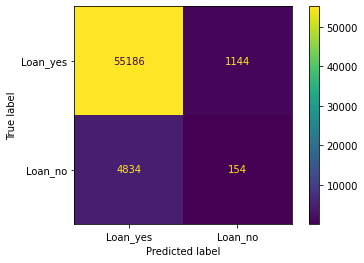

In [36]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

In [37]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56330
           1       0.12      0.03      0.05      4988

    accuracy                           0.90     61318
   macro avg       0.52      0.51      0.50     61318
weighted avg       0.85      0.90      0.88     61318



3. naive bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_res, y_res)

GaussianNB()

In [39]:
y_pred3 = model3.predict(X_test)

In [40]:
#scores
print('train score', model3.score(X_train, y_train))
print('accuracy', accuracy_score(y_test, y_pred3))
print('precision score', precision_score(y_test, y_pred3))
print('recall', recall_score(y_test, y_pred3))
print('f1 score', f1_score(y_test, y_pred3))

train score 0.39681413620036615
accuracy 0.39870837274536025
precision score 0.09429400386847195
recall 0.7427826784282278
f1 score 0.16734417344173438


In [41]:
cm = confusion_matrix(y_test, y_pred3)

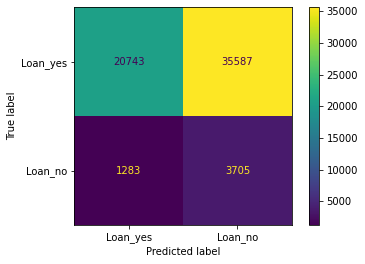

In [42]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

In [43]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.37      0.53     56330
           1       0.09      0.74      0.17      4988

    accuracy                           0.40     61318
   macro avg       0.52      0.56      0.35     61318
weighted avg       0.87      0.40      0.50     61318



### XGB

In [44]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.9090479141524511

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     56330
           1       0.18      0.03      0.06      4988

    accuracy                           0.91     61318
   macro avg       0.55      0.51      0.50     61318
weighted avg       0.86      0.91      0.88     61318



In [46]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55573,   757],
       [ 4820,   168]])

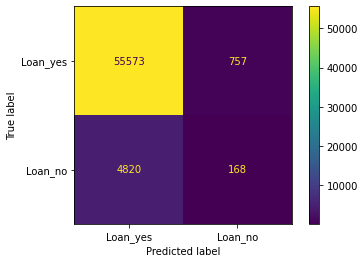

In [47]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()